In [1]:
import os
import fiftyone as fo

ROOT_DIR = os.path.dirname(os.path.abspath(''))
print(ROOT_DIR)
DATA_DIR = os.path.join(ROOT_DIR, 'Tsing-hua/low-resolution')
print(DATA_DIR)
TRAINVAL_DIR = os.path.join(ROOT_DIR, 'Tsing-hua/TrainAndValList')
print(TRAINVAL_DIR)

c:\jason\semester 8\Magang
c:\jason\semester 8\Magang\Tsing-hua/low-resolution
c:\jason\semester 8\Magang\Tsing-hua/TrainAndValList


In [2]:
# Create an empty dataset
dataset = fo.Dataset()

In [ ]:
# session.selected

In [3]:
# Initialize an empty array to store folder names
class_names = []

# Iterate over the folders in the directory
for entry in os.scandir(DATA_DIR):
    if entry.is_dir():
        class_names.append(entry.name)

# Print the folder names
print(class_names)

['1043-n000001-Shiba_Dog', '1121-n000002-French_bulldog', '1160-n000003-Siberian_husky', '1324-n000004-malamute', '1936-n000005-Pomeranian', '200-n000008-Airedale', '200-n000010-miniature_poodle', '200-n000012-affenpinscher', '201-n000024-schipperke', '202-n000020-Australian_terrier', '202-n000023-Welsh_springer_spaniel', '202-n000028-curly_coated_retriever', '203-n000015-Staffordshire_bullterrier', '203-n000016-Norwich_terrier', '203-n000021-Tibetan_terrier', '203-n000022-English_setter', '203-n000027-Norfolk_terrier', '205-n000029-Pembroke', '205-n000030-Tibetan_mastiff', '206-n000007-Border_terrier', '206-n000035-Great_Dane', '206-n000037-Scotch_terrier', '206-n000047-flat_coated_retriever', '206-n000051-Saluki', '207-n000011-Irish_setter', '207-n000026-Blenheim_spaniel', '207-n000036-Irish_terrier', '207-n000044-bloodhound', '207-n000045-redbone', '209-n000040-West_Highland_white_terrier', '209-n000042-Brabancon_griffo', '209-n000043-dhole', '209-n000049-kelpie', '209-n000054-Dober

In [4]:
data_split_count = {name:0 for name in class_names}

for name in data_split_count.keys():
    data_split_count[name] = len(os.listdir(os.path.join(DATA_DIR, name)))

print(data_split_count)

{'1043-n000001-Shiba_Dog': 1043, '1121-n000002-French_bulldog': 1121, '1160-n000003-Siberian_husky': 1160, '1324-n000004-malamute': 1324, '1936-n000005-Pomeranian': 1936, '200-n000008-Airedale': 200, '200-n000010-miniature_poodle': 200, '200-n000012-affenpinscher': 200, '201-n000024-schipperke': 201, '202-n000020-Australian_terrier': 202, '202-n000023-Welsh_springer_spaniel': 202, '202-n000028-curly_coated_retriever': 202, '203-n000015-Staffordshire_bullterrier': 203, '203-n000016-Norwich_terrier': 203, '203-n000021-Tibetan_terrier': 203, '203-n000022-English_setter': 203, '203-n000027-Norfolk_terrier': 203, '205-n000029-Pembroke': 205, '205-n000030-Tibetan_mastiff': 205, '206-n000007-Border_terrier': 206, '206-n000035-Great_Dane': 206, '206-n000037-Scotch_terrier': 206, '206-n000047-flat_coated_retriever': 206, '206-n000051-Saluki': 206, '207-n000011-Irish_setter': 207, '207-n000026-Blenheim_spaniel': 207, '207-n000036-Irish_terrier': 207, '207-n000044-bloodhound': 207, '207-n000045-r

In [5]:
train_list_path = os.path.join(TRAINVAL_DIR, 'train.lst')

with open(train_list_path, "r") as f:
    lst_contents = f.readlines()

train_array_of_paths = [line.strip() for line in lst_contents]

train_file_paths = []

for img_path in train_array_of_paths:
    joined_path = DATA_DIR + img_path[2:]
    train_file_paths.append(joined_path)

In [6]:
val_list_path = os.path.join(TRAINVAL_DIR, 'validation.lst')

with open(val_list_path, "r") as f:
    lst_contents = f.readlines()

val_array_of_paths = [line.strip() for line in lst_contents]

val_file_paths = []

for img_path in val_array_of_paths:
    joined_path = DATA_DIR + img_path[2:]
    val_file_paths.append(joined_path)

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

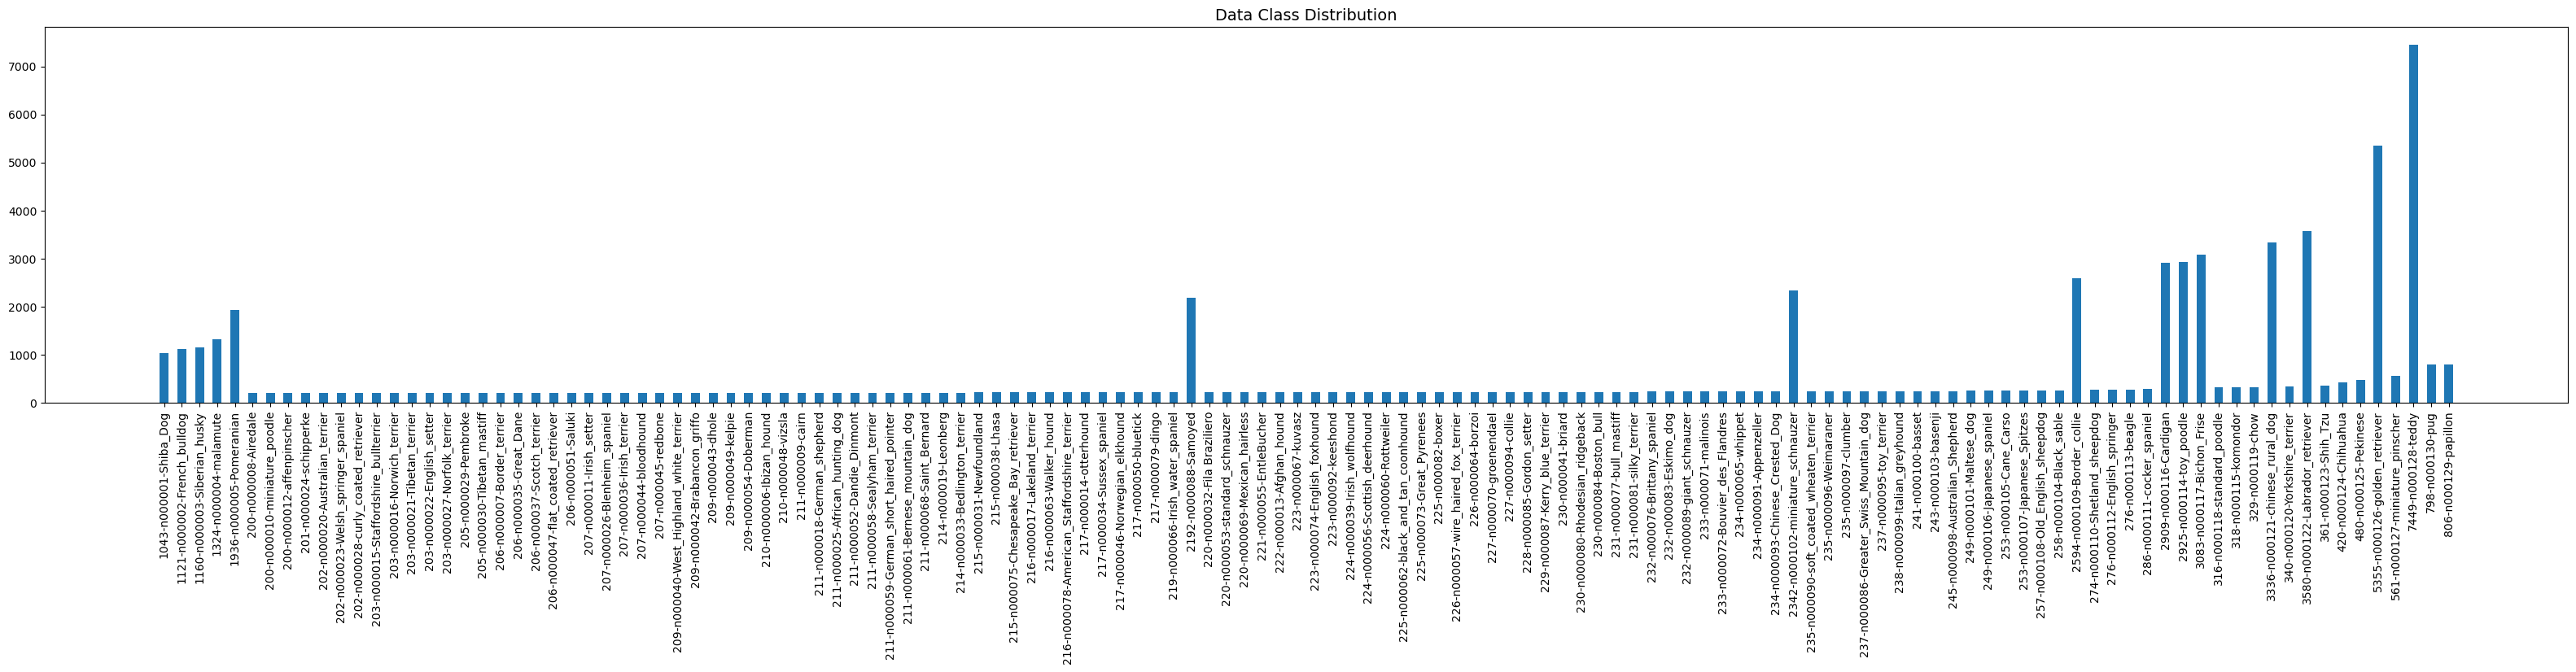

In [8]:
plt.figure(figsize=(40,6))
plt.bar(range(len(data_split_count)), list(data_split_count.values()), align='center', width=0.5)
plt.title("Data Class Distribution", fontsize=14)
plt.xticks(range(len(data_split_count)), list(data_split_count.keys()), rotation = 90, fontsize=10)
plt.show()

In [9]:
# Iterate over the train image directories
for image_directory in train_file_paths:
    # Load the image into FiftyOne
    sample = fo.Sample(filepath=image_directory)

    # Add the 'train' tag to the sample
    sample.tags.append("train")
    class_name = image_directory.split('/')[-2]
    sample["ground_truth"] = fo.Classification(label=class_name)
    
    dataset.add_sample(sample)

# Save the changes to the dataset
dataset.save()

In [10]:
# Iterate over the train image directories
for image_directory in val_file_paths:
    # Load the image into FiftyOne
    sample = fo.Sample(filepath=image_directory)

    # Add the 'train' tag and 'ground truth' label to the sample
    sample.tags.append("validation")
    class_name = image_directory.split('/')[-2]
    sample["ground_truth"] = fo.Classification(label=class_name)
    
    dataset.add_sample(sample)

# Save the changes to the dataset
dataset.save()

In [12]:
session = fo.launch_app(dataset)

In [ ]:
from fiftyone import ViewField as F

# Filter samples based on label attributes
filtered_samples = dataset.filter_field("ground_truth", F("label") == "241-n000100-basset")

# Iterate over the filtered samples
for sample in filtered_samples:
    # Access or perform operations on the filtered samples
    print(sample.filepath)

In [ ]:
# train_split_images_path = []

# for name in class_names:
#     list_files = os.listdir(os.path.join(DATA_DIR, name))
#     list_files = [os.path.join(DATA_DIR, name, file) for file in list_files]
#     train_split_images_path+=list_files

# print(train_split_images_path)

rgb_mean = np.zeros(3)
rgb_std = np.zeros(3)
rgb_median = np.zeros(3)
for file in train_file_paths:
    img = cv2.imread(file)
    image_size = img.shape[:2]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    rgb_median += np.median(img, axis=(0, 1))
    rgb_mean += np.mean(img, axis=(0, 1))
    rgb_std += np.std(img, axis=(0, 1))

train_rgb_median = rgb_median / len(train_file_paths)
train_rgb_mean = rgb_mean / len(train_file_paths)
train_rgb_std = rgb_std / len(train_file_paths)
print(f'size: {image_size}')
print(f'median: {train_rgb_median}')
print(f'mean: {train_rgb_mean}')
print(f'std: {train_rgb_std}')

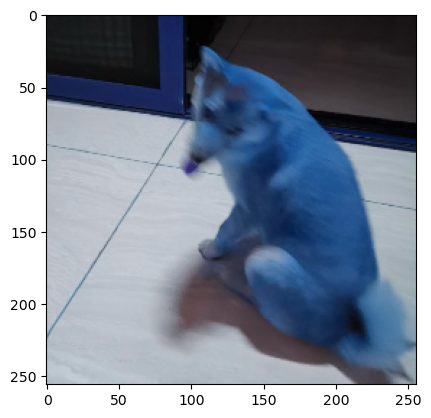

In [41]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(train_file_paths[0])

def show(img):
    plt.imshow(img)
    plt.show()

# Define the desired width and height
desired_width = 256
desired_height = 256

# Resize the image
resized_image = cv2.resize(image, (desired_width, desired_height))

show(resized_image)

In [42]:
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

size = (440, 330)
train_rgb_median = [0.53229724, 0.49277596, 0.42660908]
train_rgb_mean = [0.51889068, 0.48611316, 0.43536804]
train_rgb_std = [0.22851204, 0.2287879,  0.23019743]

random.shuffle(train_file_paths)
train_file_paths_20 = random.choices(train_file_paths, k=20)

def visualize(image):
    shape = image.shape
    if shape[-1] != 3:
        image = np.transpose(image, (1, 2, 0))
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

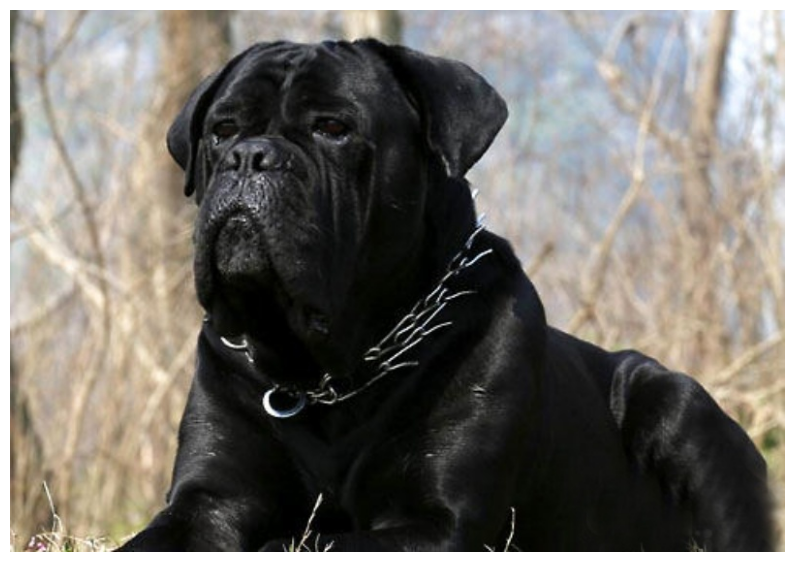

In [43]:
image = cv2.imread(train_file_paths_20[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

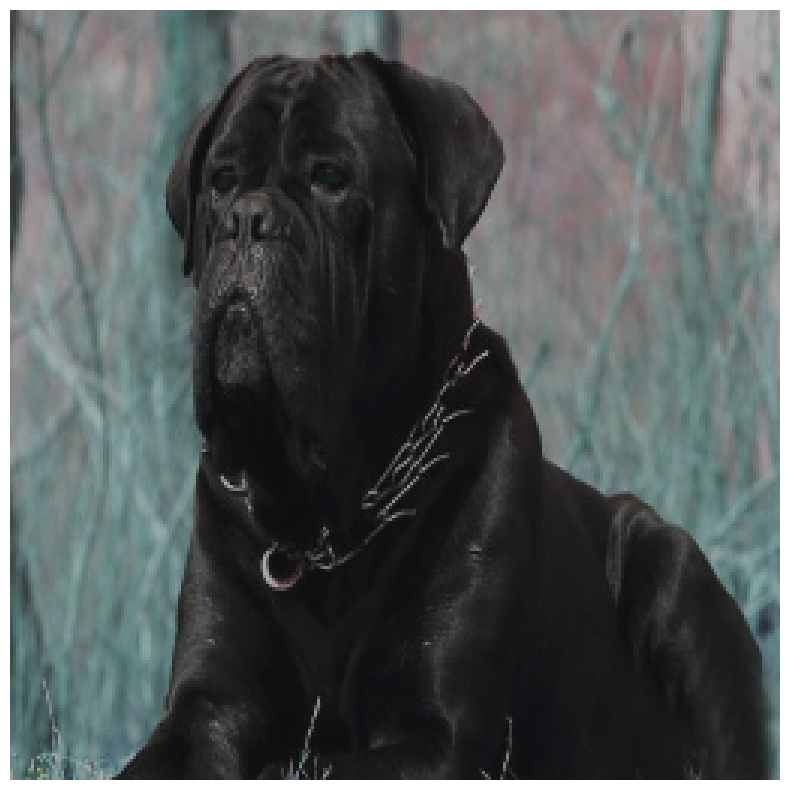

In [46]:
transformation = transforms.ColorJitter(0.3, 0.5, 0.02, 0.4)
image = cv2.imread(train_file_paths_20[0])


# Define the desired width and height
desired_width = 256
desired_height = 256

# Resize the image
image = cv2.resize(image, (desired_width, desired_height))

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_pt = torch.from_numpy(image).permute((2,0,1))
image_pt = transformation(image_pt)
visualize(image_pt.numpy())

In [ ]:
transformation = transforms.RandomSolarize(0.3)
image = cv2.imread(train_file_paths_20[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pt = torch.from_numpy(image).permute((2,0,1))
image_pt = transformation(image_pt)
visualize(image_pt.numpy())

In [ ]:
transformation = transforms.RandomCrop((256, 256))
image = cv2.imread(train_file_paths_20[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pt = torch.from_numpy(image).permute((2,0,1))
image_pt = transformation(image_pt)
visualize(image_pt.numpy())

In [ ]:
transformations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomResizedCrop(384),
    transforms.ColorJitter(0.3, 0.5, 0.02, 0.4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=train_rgb_mean, std=train_rgb_std)
])

image = cv2.imread(train_file_paths_20[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pt = transformations(image)
visualize(image_pt.numpy())

In [ ]:
transformations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(60),
    transforms.RandomChoice([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
    ]),
    transforms.CenterCrop(384),
    transforms.RandomChoice([
        transforms.ColorJitter(0.3, 0.5, 0.02, 0.4),
        transforms.RandomPosterize(3),
    ]),
    transforms.RandomChoice([
        transforms.RandomEqualize(),
        transforms.RandomAutocontrast(),
    ]),
    transforms.ToTensor(),
    transforms.Normalize(mean=train_rgb_mean, std=train_rgb_std)
])

image = cv2.imread(train_file_paths_20[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pt = transformations(image)
visualize(image_pt.numpy())

In [ ]:
rows = 5
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(25,30))
axs = axs.ravel().tolist()

for idx, file_path in enumerate(train_file_paths_20):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = transformations(image).numpy()
    image = np.transpose(image, (1, 2, 0))
    class_name = file_path.split('/')[-2]
    axs[idx].imshow(image)
    axs[idx].set_title(class_name, pad = 10)

fig.suptitle("Image from each class", y=1.05, fontsize=30)
plt.setp(axs, xticks=[],yticks=[])
plt.tight_layout()

In [ ]:
transformations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(60),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.5)),
    transforms.CenterCrop(384),
    transforms.ToTensor(),
    transforms.Normalize(mean=train_rgb_mean, std=train_rgb_std)
])

image = cv2.imread(train_file_paths_20[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pt = transformations(image)
visualize(image_pt.numpy())

In [ ]:
transformations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.8)),
    transforms.RandomRotation(60),
    transforms.CenterCrop(384),
    transforms.ToTensor(),
    transforms.Normalize(mean=train_rgb_mean, std=train_rgb_std)
])

image = cv2.imread(train_file_paths_20[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pt = transformations(image)
visualize(image_pt.numpy())

In [ ]:
transformations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.8)),
    transforms.RandomRotation(60),
        transforms.RandomChoice([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
    ]),
    transforms.CenterCrop(384),
    transforms.ToTensor(),
    transforms.Normalize(mean=train_rgb_mean, std=train_rgb_std)
])

image = cv2.imread(train_file_paths_20[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pt = transformations(image)
visualize(image_pt.numpy())